## Nearly Orthogonal

It still feels odd that random vectors in highder dimensional spaces are almost always nearly orthogonal to one another. Neural network people think this has something to do with how deep neural networks can store tons of facts.

In [1]:
import numpy as np

How can I compute if they are nearly orthogonal? Well first we can define orthogonality in the space we are used to with just saying two vectors with an angle of 90 degrees or $\frac{\pi}{2}$ radians.

We can easily compute the degrees between two vectors by 

$$
\theta = \cos^{-1} \left( \frac{ a\cdot b }{||a|| \cdot ||b|| } \right)
$$

In [7]:
def angle(x,y):
	return np.arccos(np.dot(x,y) / (np.linalg.norm(x, ord=2)*np.linalg.norm(y, ord=2)))

def radians_to_360(radians):
	return radians * 180/np.pi

radians_to_360(angle(np.array([1,0]), np.array([0, 1])))

np.float64(90.0)

I want to find if random vectors have nearly 90 degree vectors and compute how often I find them.

I'll consider nearly orthogonal as within 1 degree of 90 so between [89, 91]

In [45]:
def sim(trials=5, dims=2):
	rand = lambda: (np.random.rand(trials, dims) - 0.5)*2
	a = rand()
	b = rand()
	thetas = np.zeros((trials,))
	for i in range(trials):
		a_vec = a[i, :]
		b_vec = b[i, :]
		thetas[i] = radians_to_360(angle(a_vec, b_vec))
	nearly_orthog = (thetas >= 89) & (thetas <= 91)
	num_found = nearly_orthog.astype("int").sum()
	ratio_nearly_orthog = num_found / trials
	return ratio_nearly_orthog*100
		


np.random.seed(0)
sim()

np.float64(0.0)

Next let's plot the percent of nearly orthogonal as we increase the number of dims exponentially

In [51]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

dims = [2**i for i in range(1, 15)]
percent = [sim(trials=10_000, dims=d) for d in dims]

Text(0, 0.5, 'Percent two random vectors nearly orthogonal')

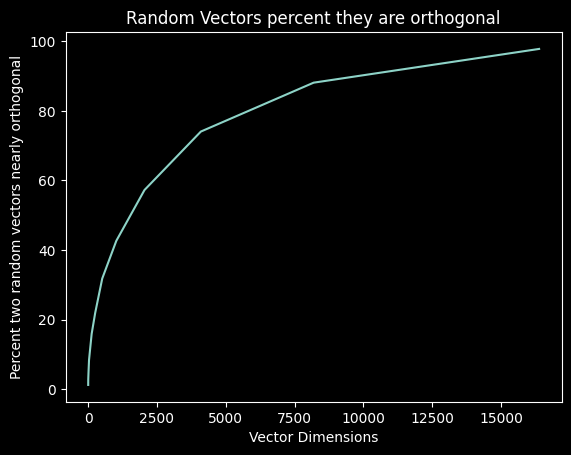

In [ ]:
plt.title("Random Vectors percent they are orthogonal")
plt.plot(dims, percent)
plt.xlabel("Vector Dimensions")
plt.ylabel("Percent two random vectors nearly orthogonal")

For large enough vectors, nearly guaranteed that any two vectors are nearly orthogonal. Weird! As you can see over 100k numbers per vector, we observe all of them being orthogonal below over 1k sampled vectors.

In [55]:
sim(trials=1_000, dims=100_000)

np.float64(100.0)